In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,recall_score,precision_score,accuracy_score

In [50]:
data=pd.read_csv('/Users/omgajipara/Desktop/Data Science/AI:ML/Machine Learning/Supervised Learning/Regression/MultipleLinearRegression/MultipleLinearRegression.csv')
data.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


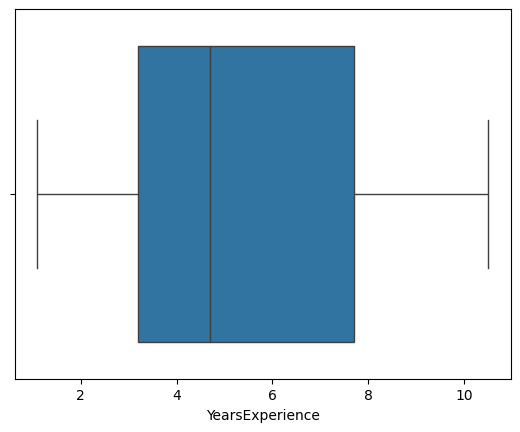

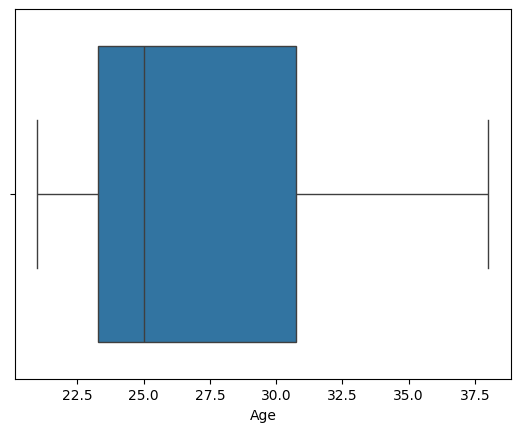

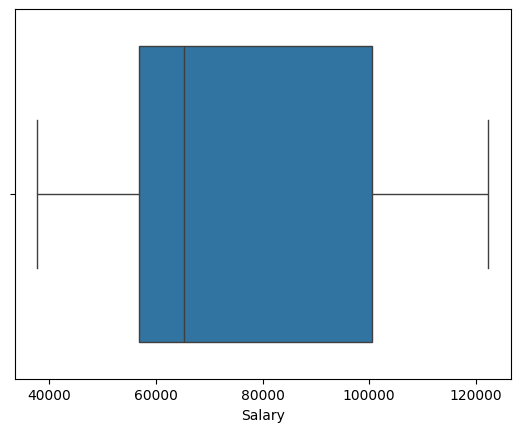

In [51]:
for i in data:
    sns.boxplot(x=i,data=data)
    plt.show()

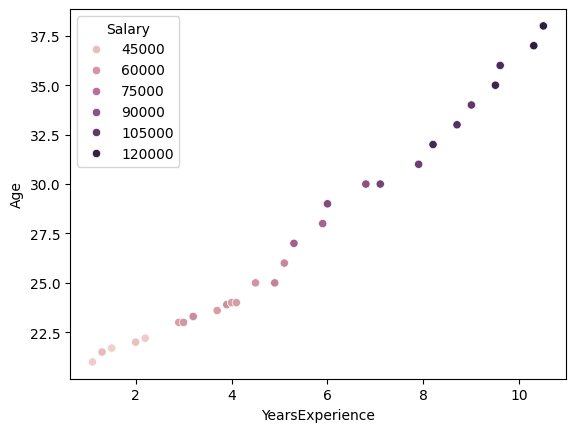

In [52]:
sns.scatterplot(x='YearsExperience',y='Age',hue='Salary',data=data)
plt.savefig("assets/KNNRegressor0.jpg")

plt.show()

In [53]:
data.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

In [54]:
x=data.iloc[:,:-1]
y=data['Salary']

scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x))


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

best_diff = float('inf')
best_state = None
best_k = None
best_train_score = 0
best_test_score = 0

# Loop through random states and k values
for random_state in range(0, 100):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=random_state)
    
    for k in range(1, 21):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(x_train, y_train)
        
        train_score = knn.score(x_train, y_train)
        test_score = knn.score(x_test, y_test)
        diff = abs(train_score - test_score)
        
        if diff < best_diff:
            best_diff = diff
            best_state = random_state
            best_k = k
            best_train_score = train_score
            best_test_score = test_score

print(f"Best Random State: {best_state}")
print(f"Best k (n_neighbors): {best_k}")
print(f"Train Accuracy: {best_train_score*100:.2f}%")
print(f"Test Accuracy: {best_test_score*100:.2f}%")
print(f"Score Difference: {best_diff*100:.2f}%")


Best Random State: 79
Best k (n_neighbors): 5
Train Accuracy: 96.77%
Test Accuracy: 96.76%
Score Difference: 0.00%


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=79)

In [57]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
knn.score(x_test,y_test)*100

96.76368484285071

In [59]:
inp=pd.DataFrame([[1.5,21.7]])
inp_scaled=scaler.transform(inp)
knn.predict(inp_scaled)

/Users/omgajipara/Desktop/Data Science/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([45500.4])

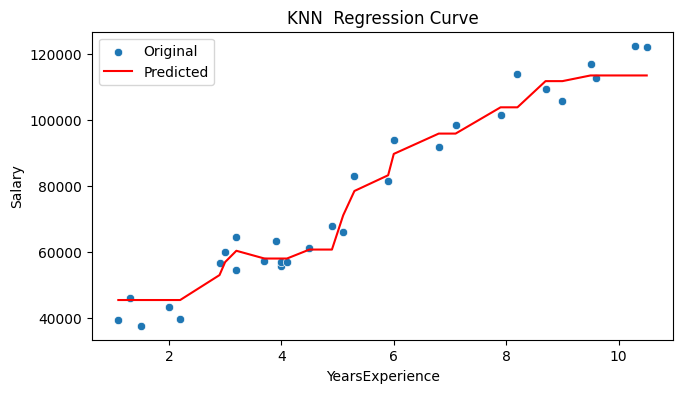

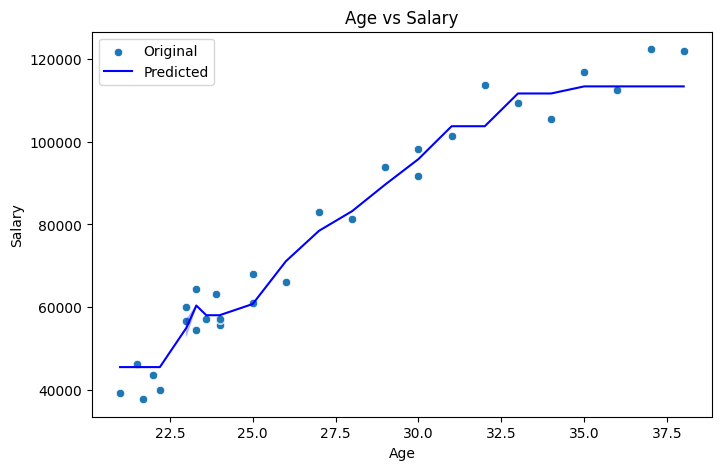

In [60]:
# Predicted salaries
yprd=knn.predict(x_scaled)



# Scatter + Line Plot: YearsExperience vs Salary
plt.figure(figsize=(7.5,4))
sns.scatterplot(x='YearsExperience', y='Salary', data=data, label='Original')
sns.lineplot(x='YearsExperience', y=yprd, data=data, color='red', label='Predicted')
plt.title("KNN  Regression Curve")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.savefig("assets/KNNRegressor1.jpg")

plt.show()

# Scatter + Line Plot: Age vs Salary
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Salary', data=data, label='Original')
sns.lineplot(x='Age', y=yprd, data=data, color='blue', label='Predicted')
plt.title("Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend()
plt.savefig("assets/KNNRegressor2.jpg")
plt.show()
